# I am not using GWLs but I want to use these functions. How can I rename the subtitles?
The variable names assume GWLs. The default subplot_titles describe GWLs, however, there is no restriction on what data you choose to visualise. 

The subplot_titles keyword takes a list of strings. 
* eg for the three panel plots: `subplot_titles= ["title 1", "title 2", "title 3"]`
* eg for the four panel plots: `subplot_titles= ["title 1", "title 2", "title 3", "title 4"]`

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 8.58 s, sys: 1.36 s, total: 9.95 s
Wall time: 12.5 s


In [3]:
subplot_titles=[f"{slr} m\nsea level\nrise" for slr in ["0.04","0.14","0.54"]]
subplot_titles

['0.04 m\nsea level\nrise',
 '0.14 m\nsea level\nrise',
 '0.54 m\nsea level\nrise']

CPU times: user 3min 54s, sys: 2.63 s, total: 3min 57s
Wall time: 4min 2s


(<Figure size 300x650 with 4 Axes>, <GeoAxes: >)

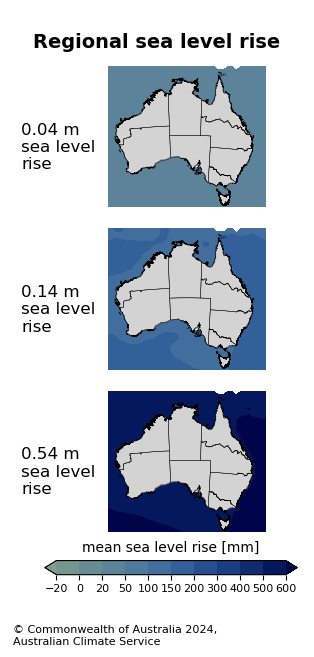

In [4]:
%%time
# regional sea level rise
# These sea level rise plots are grouped by when the global mean sea level reaches particular levels.
# Therefore, it is more appropriate to label these panels with the value of global sea level rise

var="SL1"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW1.5_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW2.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW3.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])

subplot_titles=[f"{slr} m\nsea level\nrise" for slr in ["0.04","0.14","0.54"]]

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Regional sea level rise",
                    cmap = cmap_dict["ipcc_slev_seq"],
                    ticks = [ -20, 0, 20, 50, 100, 150, 200, 300, 400, 500, 600 ],
                    cbar_label = "mean sea level rise [mm]",
                    cbar_extend="both",
                    watermark="",
                    mask_not_australia=False,
                    mask_australia=True,
                    contourf=True,
                    subplot_titles=subplot_titles,
                    issued_date="",
                    orientation="vertical",
                    tick_rotation=0,
                    vcentre=0,
                    )